# DAB-SMOTE Visualization #
## Authors: Unai Lalana Morales & José Antonio Sanz Delgado ##

### Imports ###

In [71]:
#Sistem imports
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..")))

#Local imports
import numpy as np
import matplotlib.pyplot as plt

In [72]:
#autoreload
%load_ext autoreload
%autoreload 2

#DAB-SMOTE import
from classes.Visual_DAB import Visual_DAB

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Dataset creation ###

In [73]:
# Set random seed for reproducibility and generate synthetic data
np.random.seed(42)
x = np.random.normal(loc=0, scale=1, size=100)
y = np.random.normal(loc=0, scale=1, size=100)
data = np.column_stack((x, y))

### Auxiliary functions ###

In [74]:
# function to visualize the data
def visualize_data(data, axises):
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1],  color='#32cd32')
    plt.title('Minority Class Data', fontsize=16)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.xlim(axises[0])
    plt.ylim(axises[1])
    plt.grid(True)
    plt.show()

# function to visualize the data with noise
def visualize_data_with_noise(data_with_noise, data_without_noise, axises):
    data_with_noise = data_with_noise.astype(float)
    data_without_noise = data_without_noise.astype(float)

    noise = np.array([point for point in data_with_noise if point.tolist() not in data_without_noise.tolist()])

    plt.figure(figsize=(10, 8))

    plt.scatter(data_with_noise[:, 0], data_with_noise[:, 1], color='#6a0dad', alpha=0.6, label='Outliers')
    plt.scatter(data_without_noise[:, 0], data_without_noise[:, 1], color='#32cd32', label='IQR Data')
    
    if noise.size > 0:
        plt.scatter(noise[:, 0], noise[:, 1], color='red', marker='+', s=100, label='Removed Samples')

    plt.title('Outlier Cleaning of Minority Class', fontsize=16)
    plt.xlabel('X Axis', fontsize=14)
    plt.ylabel('Y Axis', fontsize=14)
    plt.grid(True)
    plt.xlim(axises[0])
    plt.ylim(axises[1])
    plt.legend()
    plt.show()

#function to visualize the clustering results
def visualize_clustering_with_centers(data, labels, centers, axises):
    data = data.astype(float)
    num_clusters = len(np.unique(labels))
    colors = plt.cm.viridis(np.linspace(0, 1, num_clusters))

    plt.figure(figsize=(10, 8))
    for i in range(num_clusters):
        plt.scatter(
            data[labels == i, 0],
            data[labels == i, 1],
            color=colors[i],
            alpha=0.6,
            label=f'Cluster {i+1}'
        )

    if centers is not None:
        plt.scatter(
            centers[:, 0],
            centers[:, 1],
            color='red',
            marker='+',
            s=200,
            label='Cluster Centers'
        )

    plt.title('Clustering Visualization with Centers', fontsize=16)
    plt.xlabel('X Axis', fontsize=14)
    plt.ylabel('Y Axis', fontsize=14)
    plt.grid(True)
    plt.xlim(axises[0])
    plt.ylim(axises[1])
    plt.legend()
    plt.show()

# function to visualize the clusters with boundaries
def visualize_clusters_with_boundaries(X, clusters, boundaries_list, axises):
    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(clusters)
    colors = plt.cm.get_cmap('tab10', len(unique_clusters))
    edge_colors = ["blue", "brown", "cyan"]
    for idx, cluster_id in enumerate(unique_clusters):
        cluster_points = X[clusters == cluster_id]
        boundaries = np.array(boundaries_list[idx])
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', alpha=0.6, color=colors(idx))
        if boundaries.size > 0:
            plt.scatter(boundaries[:, 0], boundaries[:, 1], edgecolor=edge_colors[idx % len(edge_colors)], facecolor='none', s=100, linewidth=2, label=f'Cluster {cluster_id} Boundaries')
    plt.title('Clusters and Boundary Points', fontsize=16)
    plt.xlabel('X Axis', fontsize=14)
    plt.ylabel('Y Axis', fontsize=14)
    plt.xlim(axises[0])
    plt.ylim(axises[1])
    plt.grid(True)
    plt.legend()
    plt.show()

def visualize_generated_data(data, newX, axises):
    plt.figure(figsize=(10, 8))
    plt.scatter(data[:, 0], data[:, 1], color='#32cd32', alpha=0.6, label='Original data')
    plt.scatter(newX[:, 0], newX[:, 1], color='red', label='Synthesized new data')
    plt.title('Minority Class')
    plt.xlabel('X Axis')
    plt.ylabel('Y Axis')
    plt.grid(True)
    plt.xlim(axises[0])
    plt.ylim(axises[1])
    plt.legend()
    plt.show()

### Visualization step by step ###

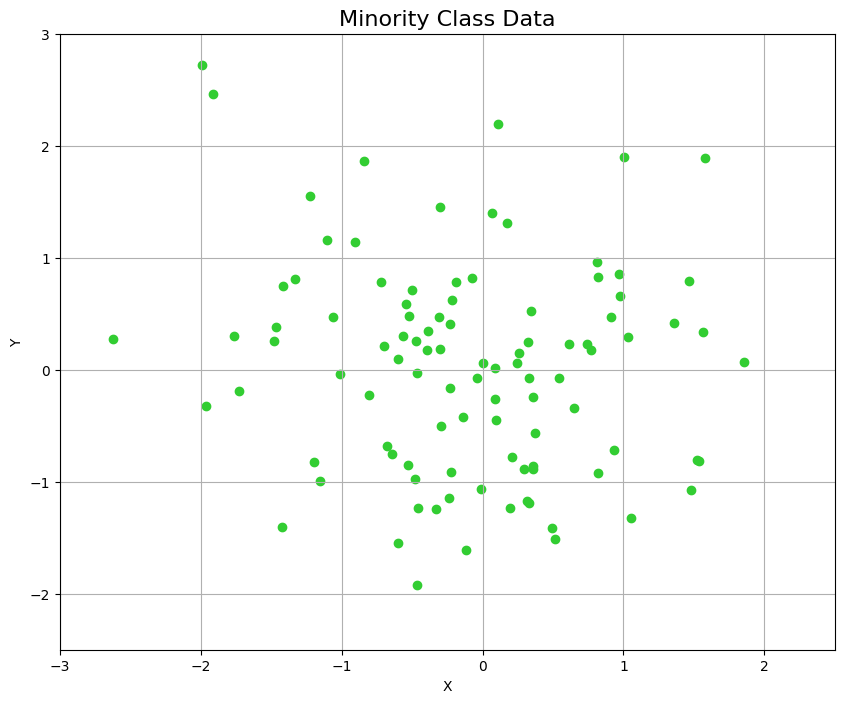

In [75]:
visualize_data(data, axises=[[-3, 2.5],[-2.5, 3]])
dab = Visual_DAB(k=1.5)

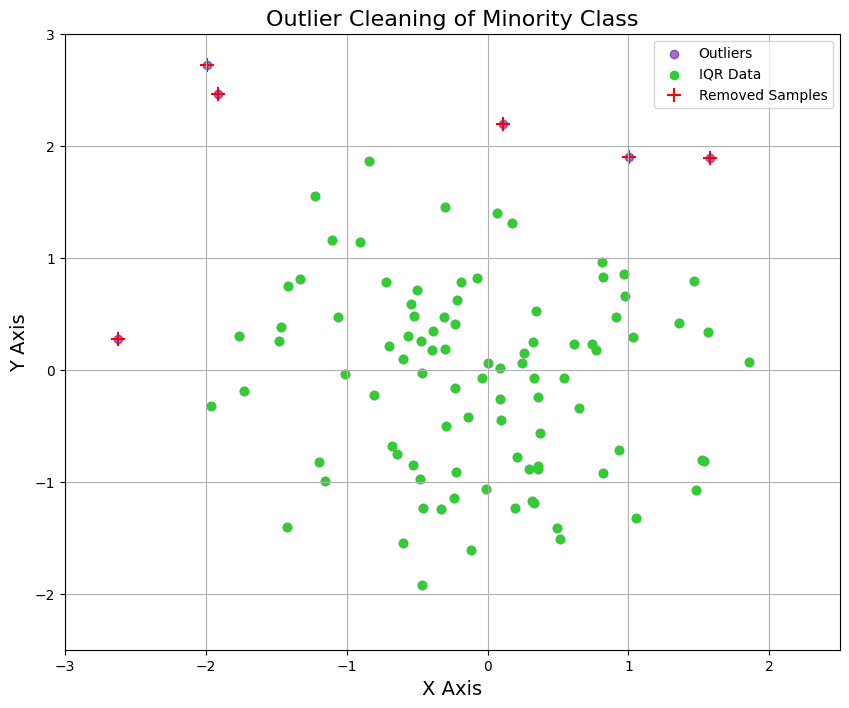

In [76]:
data_wo_noise = dab.get_removed_samples(data)
visualize_data_with_noise(data, data_wo_noise, axises=[[-3, 2.5],[-2.5, 3]])

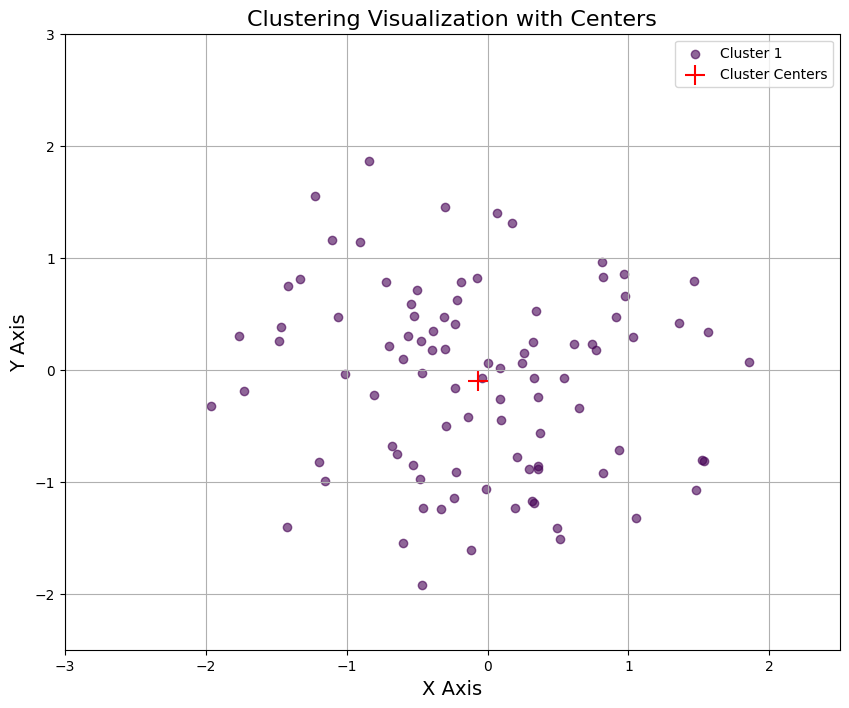

In [77]:
centre, clusters = dab.get_clustering(data_wo_noise)
visualize_clustering_with_centers(data_wo_noise, clusters, centre, axises=[[-3, 2.5],[-2.5, 3]])

C:\Users\Unai\AppData\Local\Temp\ipykernel_8408\1099523205.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


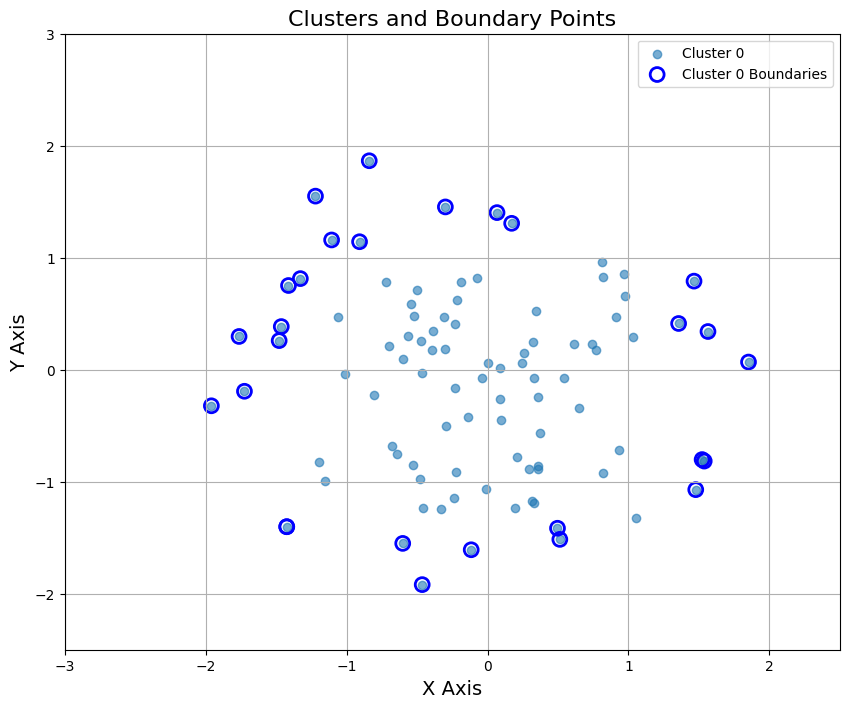

In [78]:
borders = dab.get_screened_boundaries(data_wo_noise, clusters)
visualize_clusters_with_boundaries(data_wo_noise, clusters, borders, axises=[[-3, 2.5],[-2.5, 3]])

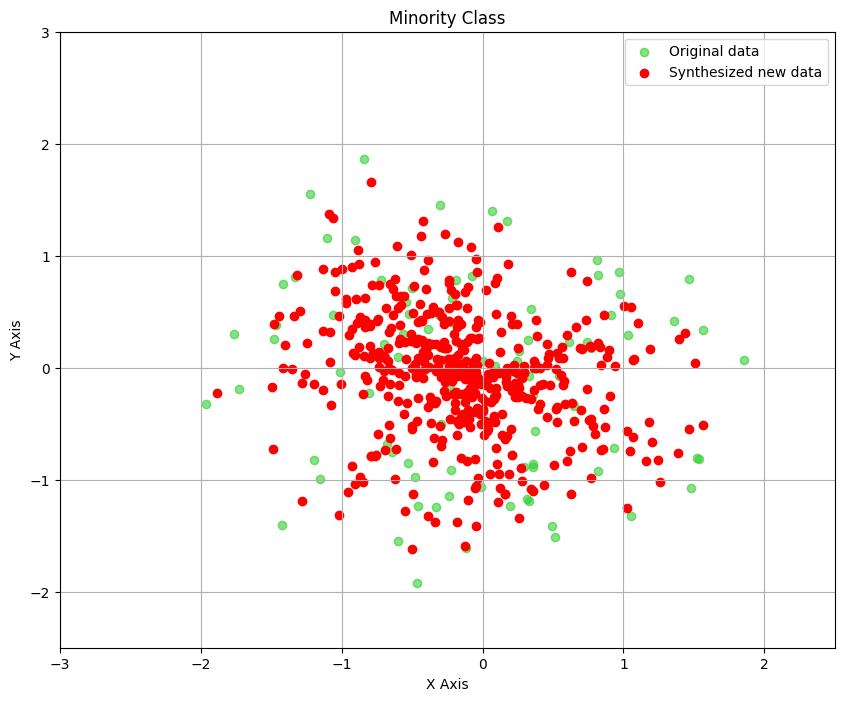

In [79]:
np.random.seed(42)
newX = dab.get_generated_samples(data_wo_noise, borders, clusters, centre, 500)
visualize_generated_data(data_wo_noise, newX, axises=[[-3, 2.5],[-2.5, 3]])

### Visualization step by step 2 clusters ###

In [80]:
np.random.seed(42)
cluster_1 = np.random.normal(loc=(-5, 0), scale=1.0, size=(200 // 2, 2))
cluster_2 = np.random.normal(loc=(5, 0), scale=1.0, size=(200 // 2, 2))
data2 = np.vstack([cluster_1, cluster_2])

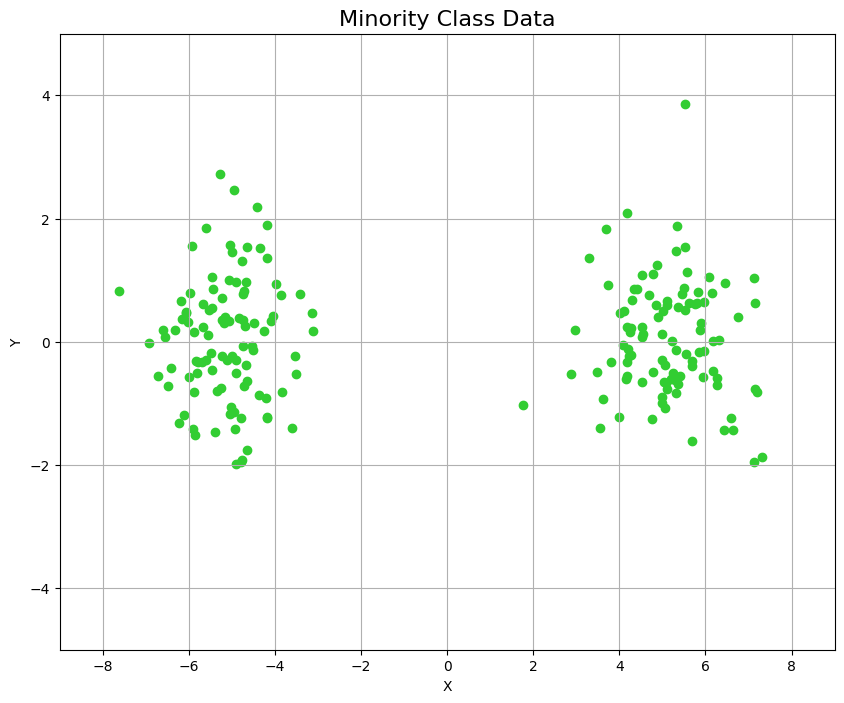

In [81]:
visualize_data(data2, axises=[[-9, 9],[-5, 5]])

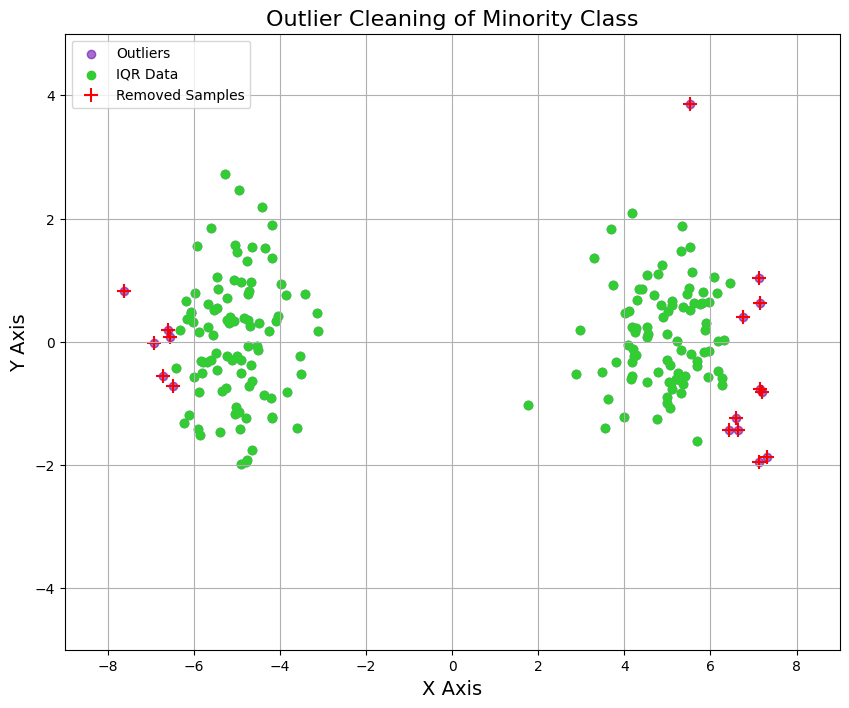

In [82]:
data_wo_noise2 = dab.get_removed_samples(data2)
visualize_data_with_noise(data2, data_wo_noise2, axises=[[-9, 9],[-5, 5]])

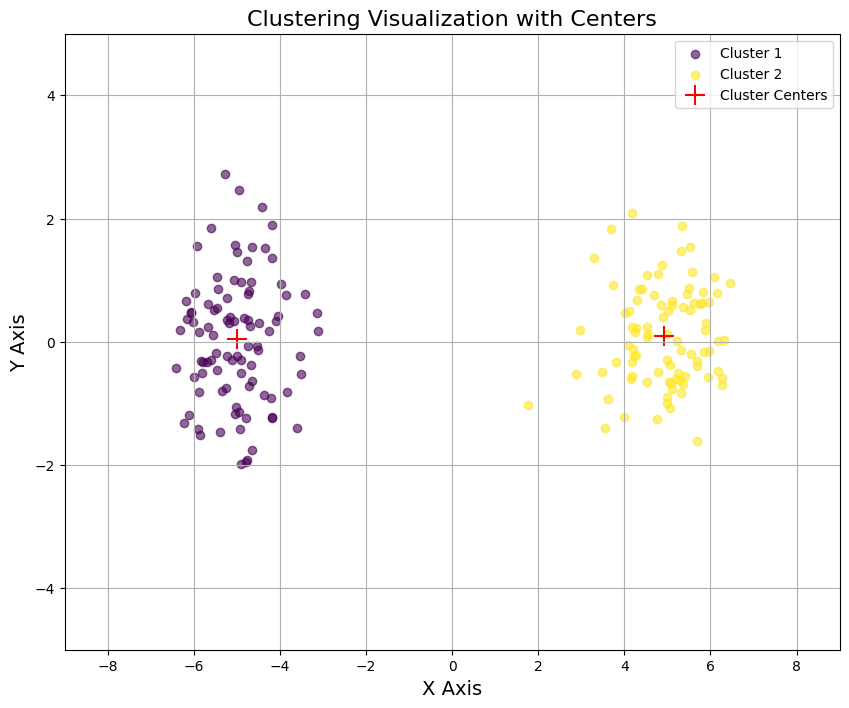

In [83]:
centre2, clusters2 = dab.get_clustering(data_wo_noise2)
visualize_clustering_with_centers(data_wo_noise2, clusters2, centre2, axises=[[-9, 9],[-5, 5]])

C:\Users\Unai\AppData\Local\Temp\ipykernel_8408\1099523205.py:76: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(unique_clusters))


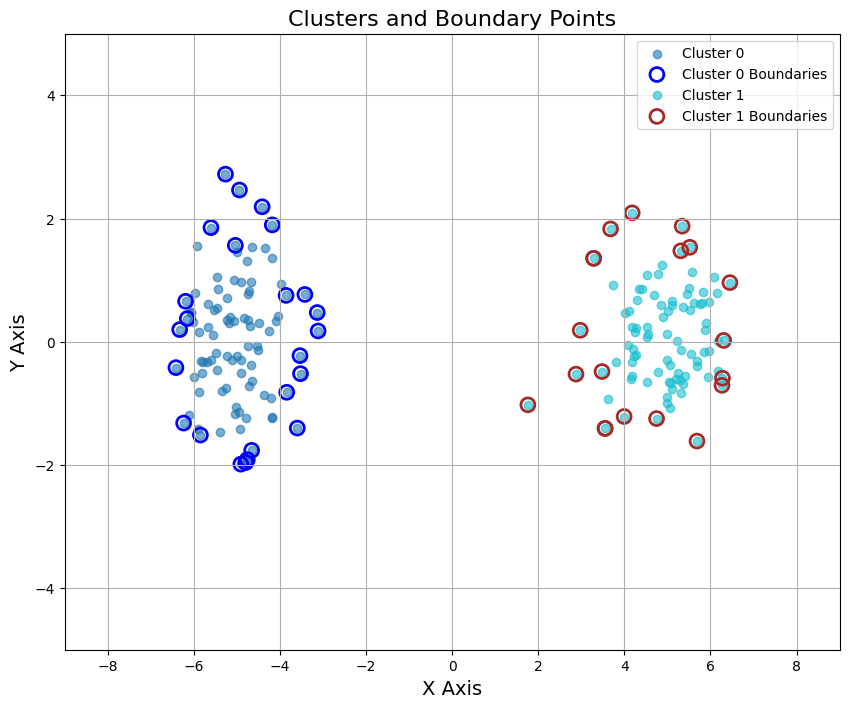

In [84]:
borders2 = dab.get_screened_boundaries(data_wo_noise2, clusters2)
visualize_clusters_with_boundaries(data_wo_noise2, clusters2, borders2, axises=[[-9, 9],[-5, 5]])

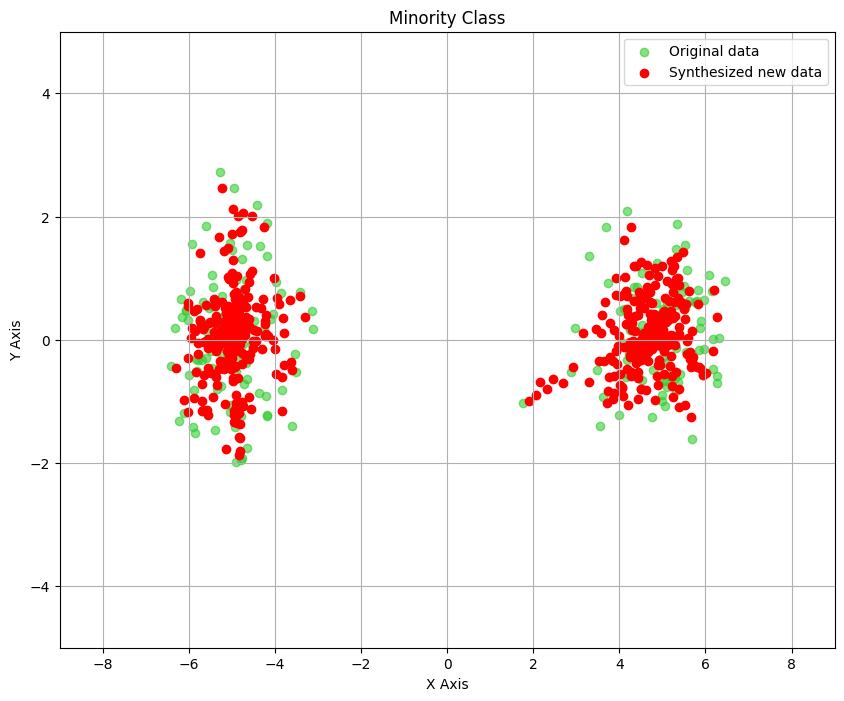

In [85]:
np.random.seed(42)
newX2 = dab.get_generated_samples(data_wo_noise2, borders2, clusters2, centre2, 500)
visualize_generated_data(data_wo_noise2, newX2, axises=[[-9, 9],[-5, 5]])